# Mamdani - HVAC Control System
This notebook demonstrates a Mamdani fuzzy inference system for controlling an HVAC system based on indoor temperature, humidity, and CO2 levels.

In [1]:
# Imports necessary modules/packages and sets up the environment for experimentation.
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

from hvac_control_app import humid, cooling

# Navigate up to the project root directory dynamically.
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the project root to the system path to import custom modules from mylibs package.
sys.path.append(project_root)

# Import the custom module from the mylibs package.
import mylibs.membership_functions as mf

### 1. Design Membership
<p> In this part, we design the membership definition (range/degree) - no data yet.

Important: If membership range goes wrong, the whole model can go wrong!

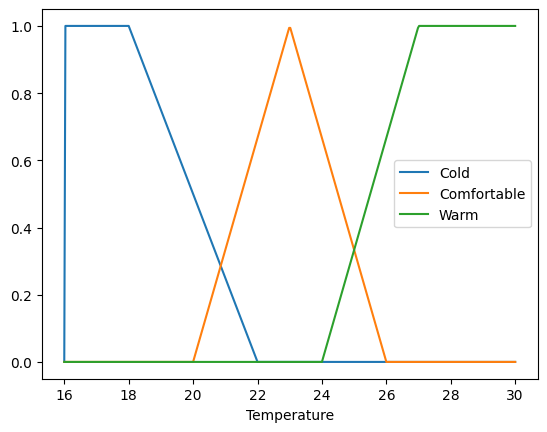

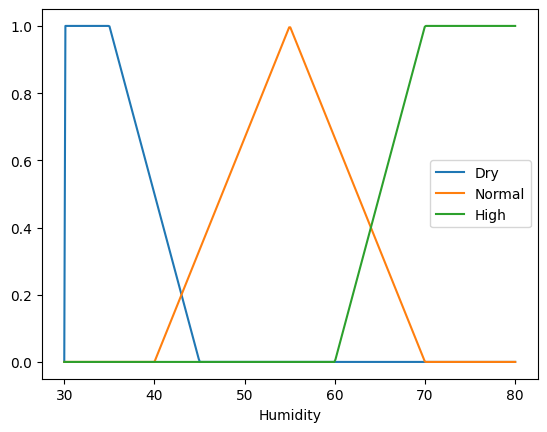

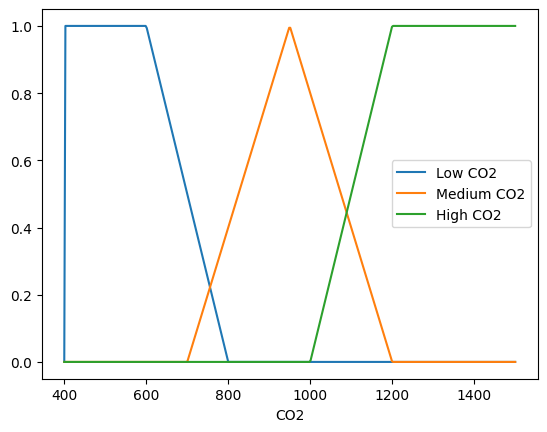

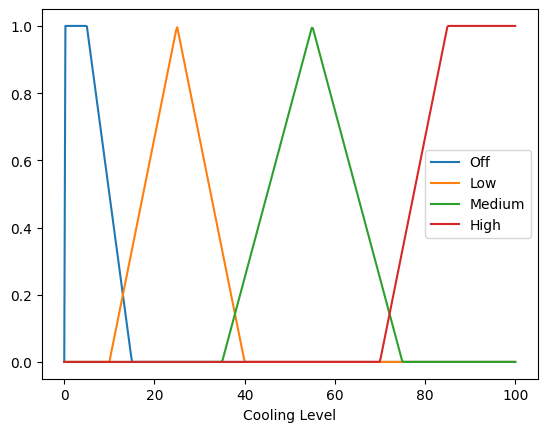

In [2]:
# Soiledness Membership Functions
temp = np.linspace(16, 30, 400)
cold_temp = np.array([mf.trap(x, 16, 16, 18,22) for x in temp])
comfortable_temp = np.array([mf.tri(x, 20, 23, 26) for x in temp])
warm_temp = np.array([mf.trap(x, 24, 27, 30, 30) for x in temp])

humid = np.linspace(30, 80, 400)
dry_humid = np.array([mf.trap(x, 30, 30, 35, 45) for x in humid])
normal_humid = np.array([mf.tri(x, 40, 55, 70) for x in humid])
high_humid = np.array([mf.trap(x, 60, 70, 80, 80) for x in humid])

co2 = np.linspace(400, 1500, 400)
low_co2 = np.array([mf.trap(x, 400, 400, 600, 800) for x in co2])
medium_co2 = np.array([mf.tri(x, 700, 950, 1200) for x in co2])
high_co2 = np.array([mf.trap(x, 1000, 1200, 1500, 1500) for x in co2])

cooling = np.linspace(0, 100, 400)
off_cool = np.array([mf.trap(x, 0, 0, 5, 15) for x in cooling])
low_cool = np.array([mf.tri(x, 10, 25, 40) for x in cooling])
medium_cool = np.array([mf.tri(x, 35, 55, 75) for x in cooling])
high_cool = np.array([mf.trap(x, 70, 85, 100, 100) for x in cooling])

# Indoor Temperature, Humidity and CO2 Plots
plt.figure(0)
plt.plot(temp, cold_temp, label="Cold")
plt.plot(temp, comfortable_temp, label="Comfortable")
plt.plot(temp, warm_temp, label="Warm")
plt.legend()
plt.xlabel("Temperature")

plt.figure(1)
plt.plot(humid, dry_humid, label="Dry")
plt.plot(humid, normal_humid, label="Normal")
plt.plot(humid, high_humid, label="High")
plt.legend()
plt.xlabel("Humidity")

plt.figure(2)
plt.plot(co2, low_co2, label="Low CO2")
plt.plot(co2, medium_co2, label="Medium CO2")
plt.plot(co2, high_co2, label="High CO2")
plt.legend()
plt.xlabel("CO2")

# Cooling Level Plots
plt.figure(3)
plt.plot(cooling, off_cool, label="Off")
plt.plot(cooling, low_cool, label="Low")
plt.plot(cooling, medium_cool, label="Medium")
plt.plot(cooling, high_cool, label="High")
plt.legend()
plt.xlabel("Cooling Level")
plt.show()

### 1. Fuzzification

Input gets fuzzified.

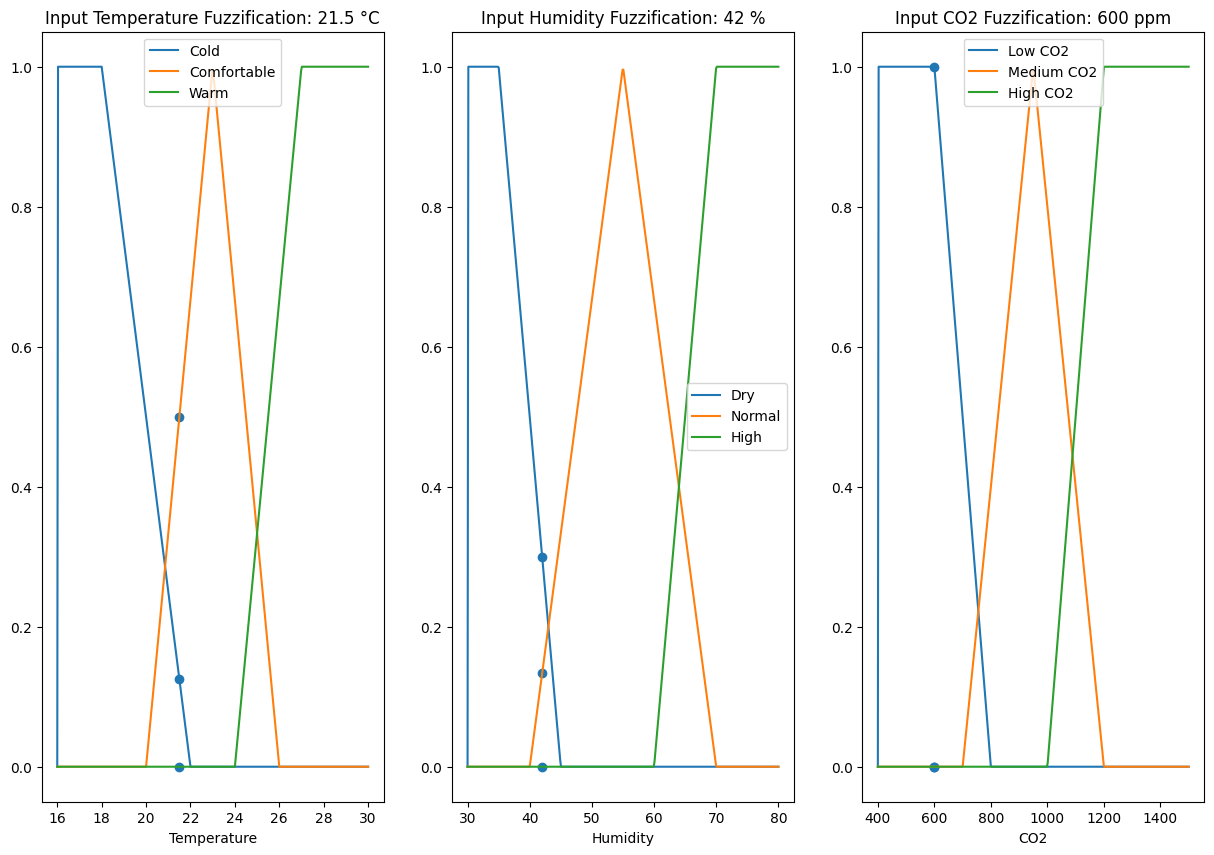

################################################################################
#temperature input: 21.5 °C
fuzzified in_cold_temp: 0.125
fuzzified in_comfortable_temp: 0.5
fuzzified in_warm_temp: 0
################################################################################
#humidity input: 42 %
fuzzified in_dry_humid: 0.30000000000000004
fuzzified in_normal_humid: 0.13333333333333333
fuzzified in_high_humid: 0
################################################################################
Example 1:
#CO2 input: 600 ppm
fuzzified in_low_co2: 1
fuzzified in_medium_co2: 0
fuzzified in_high_co2: 0
################################################################################


In [3]:
# Inputs needs to fuzzified using the membership functions defined above.
in_temp = 21.5
in_cold_temp = mf.trap(in_temp, 16, 16, 18,22)
in_comfortable_temp = mf.tri(in_temp, 20, 23, 26)
in_warm_temp = mf.trap(in_temp, 24, 27, 30, 30)

in_humid = 42
in_dry_humid = mf.trap(in_humid, 30, 30, 35, 45)
in_normal_humid = mf.tri(in_humid, 40, 55, 70)
in_high_humid = mf.trap(in_humid, 60, 70, 80, 80)

in_co2 = 600
in_low_co2 = mf.trap(in_co2, 400, 400, 600, 800)
in_medium_co2 = mf.tri(in_co2, 700, 950, 1200)
in_high_co2 = mf.trap(in_co2, 1000, 1200, 1500, 1500)

# Temperature Plots with input fuzzified points
plt.figure(0, figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.plot(temp, cold_temp, label="Cold")
plt.plot(temp, comfortable_temp, label="Comfortable")
plt.plot(temp, warm_temp, label="Warm")

plt.scatter([in_temp, in_temp, in_temp], [in_cold_temp, in_comfortable_temp, in_warm_temp])
plt.xlabel("Temperature")
plt.title("Input Temperature Fuzzification: 21.5 °C")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(humid, dry_humid, label="Dry")
plt.plot(humid, normal_humid, label="Normal")
plt.plot(humid, high_humid, label="High")

plt.scatter([in_humid, in_humid, in_humid], [in_dry_humid, in_normal_humid, in_high_humid])
plt.xlabel("Humidity")
plt.title("Input Humidity Fuzzification: 42 %")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(co2, low_co2, label="Low CO2")
plt.plot(co2, medium_co2, label="Medium CO2")
plt.plot(co2, high_co2, label="High CO2")

plt.scatter([in_co2, in_co2, in_co2], [in_low_co2, in_medium_co2, in_high_co2])
plt.xlabel("CO2")
plt.title("Input CO2 Fuzzification: 600 ppm")
plt.legend()
plt.show()

print(f"################################################################################")
print(f"#temperature input: {in_temp} °C")
print(f"fuzzified in_cold_temp: {in_cold_temp}")
print(f"fuzzified in_comfortable_temp: {in_comfortable_temp}")
print(f"fuzzified in_warm_temp: {in_warm_temp}")
print(f"################################################################################")
print(f"#humidity input: {in_humid} %")
print(f"fuzzified in_dry_humid: {in_dry_humid}")
print(f"fuzzified in_normal_humid: {in_normal_humid}")
print(f"fuzzified in_high_humid: {in_high_humid}")
print(f"################################################################################")
print(f"Example 1:")
print(f"#CO2 input: {in_co2} ppm")
print(f"fuzzified in_low_co2: {in_low_co2}")
print(f"fuzzified in_medium_co2: {in_medium_co2}")
print(f"fuzzified in_high_co2: {in_high_co2}")
print(f"################################################################################")

### 2. Rules
Must Do Composition with the Output - to evaluate the rules <p> 
A*B?? because R1 & R2 are matrices.

`np.fmin` - compares two arrays and returns a new array with the minima <a href=https://www.geeksforgeeks.org/python/numpy-fmin-in-python>Ref</a>

R1 = np.fmin(in_less_s,less_t) - compares ~0.7 with array and returns the minima

<p> Question: fmin returns minima and doesn't do max-min! So, how two matrices get composed?

In [4]:
reload(mf)
# Evaluation of Rules
# R1 : If Temp is Cold, THEN Cooling is Off
R1 = np.fmin(in_cold_temp, off_cool)

# R2 : If Humidity is high and Temp is Warm, THEN Cooling is High
ant = np.min([in_high_humid, in_warm_temp])
R2 = np.fmin(ant, high_cool)

# R3 : If CO2 is High and Temp is Warm, THEN Cooling is High
ant = np.min([in_high_co2, in_warm_temp])
R3 = np.fmin(ant, high_cool)

#R4 : If CO2 is Medium and Temp is Warm, THEN Cooling is Medium
ant = np.min([in_medium_co2, in_warm_temp])
R4 = np.fmin(ant, medium_cool)

#R5 : If CO2 is Medium and Temp is Comfortable, THEN Cooling is Low
ant = np.min([in_medium_co2, in_comfortable_temp])
R5 = np.fmin(ant, low_cool)

# R6 : If CO2 is Low and Temp is Warm, THEN Cooling is Low
ant = np.min([in_low_co2, in_warm_temp])
R6 = np.fmin(ant, low_cool)

# R7 : If CO2 is Low and Temp is Comfortable and Humidity is Normal, THEN Cooling is OFF
ant = np.min([in_low_co2, in_comfortable_temp, in_normal_humid])
R7 = np.fmin(ant, off_cool)

In [5]:
# summarize the Rules
R = np.fmax(R1,
      np.fmax(R2,
      np.fmax(R3,
      np.fmax(R4,
      np.fmax(R5,
      np.fmax(R6,
              R7))))))

### 3. Defuzzification 
Centroid - centre of any random 2D object. Integral used for finding the centroid.<p>
R forms a regions (union of R1 & R2). So, centre point of R is the defuzzified answer!

Why Y-axis centroid not calculated?<p>
- Because Y-axis is membership and only X-axis is the value that is needed.

Cooling Level :  7.233327240763003


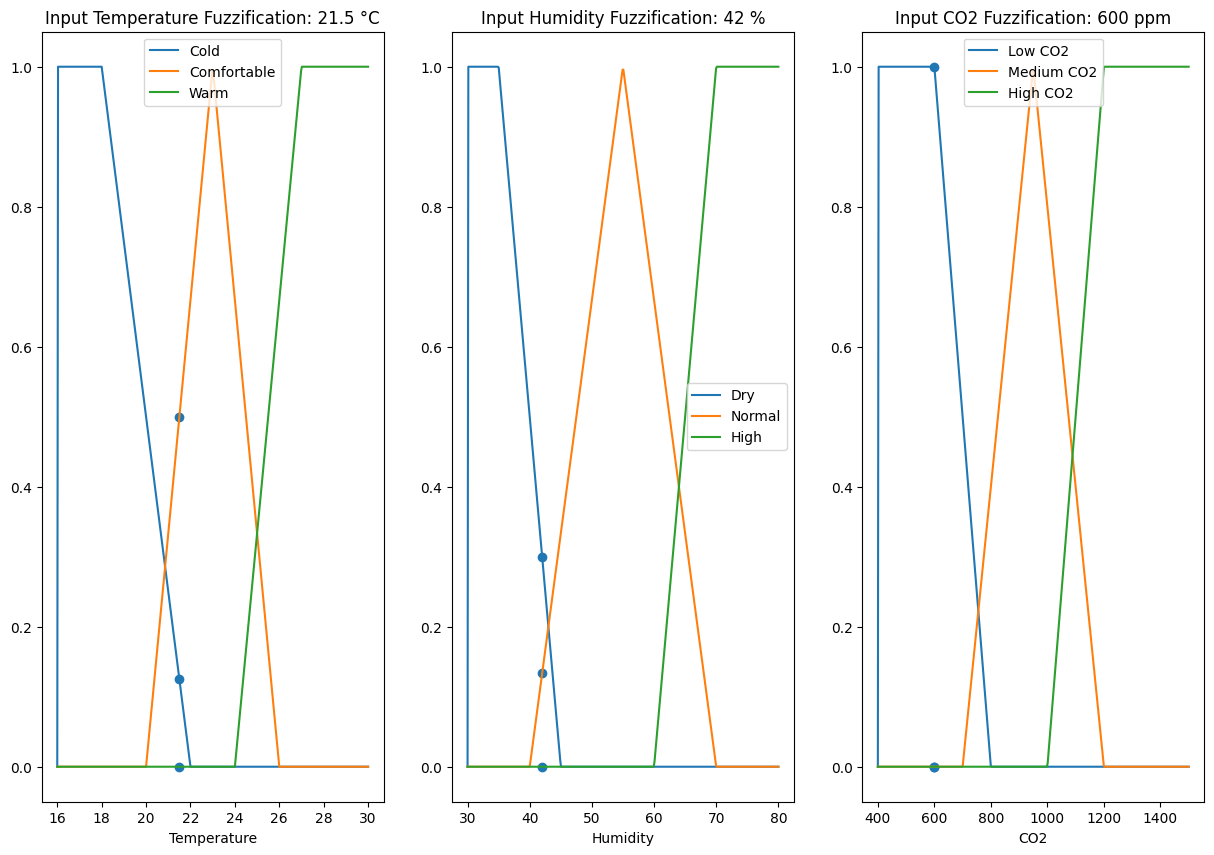

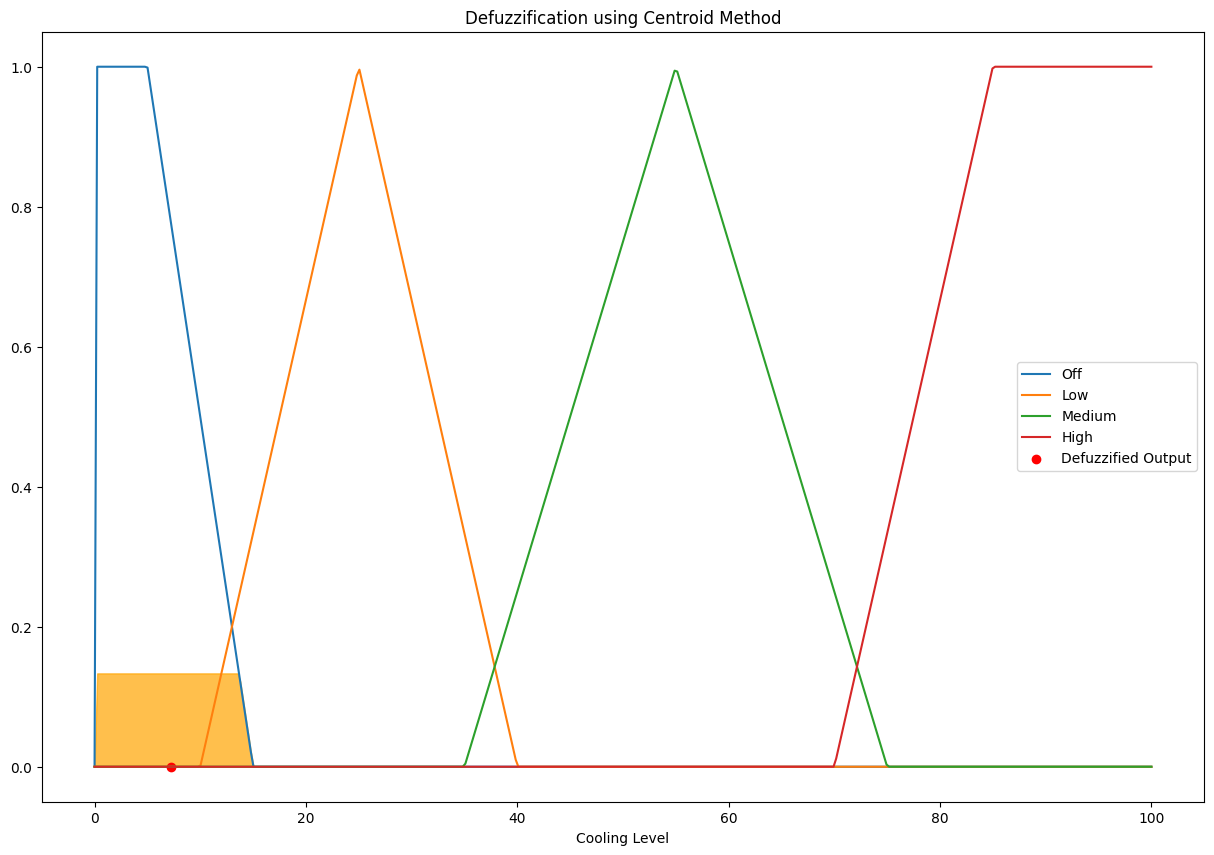

In [6]:
# Defuzzification
res = mf.defuzzify(cooling, R)
print("Cooling Level : ", res)

# Cooling Level Plot with defuzzified point
plt.figure(0, figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.plot(temp, cold_temp, label="Cold")
plt.plot(temp, comfortable_temp, label="Comfortable")
plt.plot(temp, warm_temp, label="Warm")

plt.scatter([in_temp, in_temp, in_temp], [in_cold_temp, in_comfortable_temp, in_warm_temp])
plt.xlabel("Temperature")
plt.title("Input Temperature Fuzzification: 21.5 °C")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(humid, dry_humid, label="Dry")
plt.plot(humid, normal_humid, label="Normal")
plt.plot(humid, high_humid, label="High")

plt.scatter([in_humid, in_humid, in_humid], [in_dry_humid, in_normal_humid, in_high_humid])
plt.xlabel("Humidity")
plt.title("Input Humidity Fuzzification: 42 %")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(co2, low_co2, label="Low CO2")
plt.plot(co2, medium_co2, label="Medium CO2")
plt.plot(co2, high_co2, label="High CO2")

plt.scatter([in_co2, in_co2, in_co2], [in_low_co2, in_medium_co2, in_high_co2])
plt.xlabel("CO2")
plt.title("Input CO2 Fuzzification: 600 ppm")
plt.legend()

plt.figure(1, figsize=(15, 10))
plt.plot(cooling, off_cool, label="Off")
plt.plot(cooling, low_cool, label="Low")
plt.plot(cooling, medium_cool, label="Medium")
plt.plot(cooling, high_cool, label="High")
plt.fill_between(cooling, np.zeros_like(cooling), R, color='orange', alpha=0.7)
plt.scatter([res], [0], color='red', label="Defuzzified Output")
plt.xlabel("Cooling Level")
plt.title("Defuzzification using Centroid Method")
plt.legend()
plt.show()
